# Simulation 4: Batch Size Sweep

TJ Kim
8/8/20

Find performance based on batch size:
- 15 users, 8 servers, 16 ts
- Jobs last entire duration
- Resources, limited

Batch sizes to sweep:
- 1,2,4,6,8,12,16

In [1]:
from IPython.core.debugger import set_trace

# Import Generic Classes
import numpy as np
import copy
import pickle
import random

# Import All Custom Classes
import os, sys
sys.path.append(os.path.pardir+"/classes")
sys.path.append(os.path.pardir+"/solvers")
sys.path.append(os.path.pardir+"/one_mobility")
sys.path.append(os.path.curdir + "/sim_store/sim4")


from Server import *
from User import *
from Link import *
from Job import *
from Migration_Plans import *
from Cost_Recordings import *

from sim4_setting import *

# Import Solver Classes
from Optim_PlanGenerator import *
from SeqGreedy_PlanGenerator import *
from Myopic_PlanGenerator import *
from Naive_PlanGenerator import *

### Run Simulations

First set batch settings and num trials.

In [2]:
batch_settings = [1,2,4,8,12]
batch_cost_stores = {}
for val in batch_settings:
    batch_cost_stores[val] = []

In [3]:
num_trials = 10
i = 0

while i < num_trials:
    print("Trial Number:",i)
    
    try:
        # Make Users shared amongst all batch values
        users, servers, links, jobs, sim_param = simulation_setting()
        curr_list = []

        for val in batch_settings:
            print("batch val:",val)

            refresh_rate = [val,0]
            refresh = True

            for j in range(len(jobs)):
                jobs[j].info_from_usr(users[j],refresh_rate,refresh)

            # Make Batch Prob

            print("batch_prob...")
            Batch_prob = SeqGreedy_PlanGenerator(users, servers, links, jobs, sim_param)
            Batch_plan = Migration_Plans(users,jobs,sim_param)
            Batch_plan.from_seq_greedy(Batch_prob)
            print("done!")

            curr_list += [Batch_plan]

        for j in range(len(curr_list)):
            val = batch_settings[j]
            batch_cost_stores[val] += [Cost_Recordings(curr_list[j])]

        i += 1
    except:
        continue

Trial Number: 0
batch val: 1
batch_prob...
Struck Placement Resource (j,s,t): 8 3 4
Struck Placement Resource (j,s,t): 6 1 8
Struck Placement Resource (j,s,t): 6 4 8
done!
batch val: 2
batch_prob...
Struck Placement Resource (j,s,t): 8 3 5
Struck Placement Resource (j,s,t): 8 3 6
Struck Placement Resource (j,s,t): 6 4 7
Struck Placement Resource (j,s,t): 6 5 7
Struck Placement Resource (j,s,t): 8 3 7
Struck Placement Resource (j,s,t): 8 3 8
Struck Placement Resource (j,s,t): 6 4 9
Struck Placement Resource (j,s,t): 8 3 9
Struck Placement Resource (j,s,t): 8 3 10
Struck Placement Resource (j,s,t): 6 4 11
Struck Placement Resource (j,s,t): 7 5 11
done!
batch val: 4
batch_prob...
Struck Placement Resource (j,s,t): 8 3 5
Struck Placement Resource (j,s,t): 8 3 6
Struck Placement Resource (j,s,t): 8 3 7
Struck Placement Resource (j,s,t): 8 3 8
Struck Placement Resource (j,s,t): 3 5 9
Struck Placement Resource (j,s,t): 5 5 9
Struck Placement Resource (j,s,t): 5 5 10
Struck Placement Resource 

Struck Placement Resource (j,s,t): 4 5 9
Struck Placement Resource (j,s,t): 8 5 10
Struck Placement Resource (j,s,t): 8 5 11
done!
batch val: 12
batch_prob...
Struck Placement Resource (j,s,t): 8 4 0
Struck Placement Resource (j,s,t): 8 4 1
Struck Placement Resource (j,s,t): 8 5 2
Struck Placement Resource (j,s,t): 8 5 3
Struck Placement Resource (j,s,t): 8 5 4
Struck Placement Resource (j,s,t): 8 5 0
Struck Placement Resource (j,s,t): 8 5 1
Struck Placement Resource (j,s,t): 8 4 2
Struck Placement Resource (j,s,t): 8 4 3
Struck Placement Resource (j,s,t): 8 4 4
Struck Placement Resource (j,s,t): 8 5 5
Struck Placement Resource (j,s,t): 8 4 5
Struck Placement Resource (j,s,t): 8 4 6
Struck Placement Resource (j,s,t): 8 4 7
Struck Placement Resource (j,s,t): 8 4 8
Struck Placement Resource (j,s,t): 8 4 9
Struck Placement Resource (j,s,t): 8 4 10
Struck Placement Resource (j,s,t): 8 4 11
done!
Trial Number: 2
batch val: 1
batch_prob...
Struck Placement Resource (j,s,t): 2 0 0
Struck Plac

Struck Placement Resource (j,s,t): 7 5 0
Struck Placement Resource (j,s,t): 7 5 1
Struck Placement Resource (j,s,t): 9 0 0
Struck Placement Resource (j,s,t): 9 5 0
Struck Placement Resource (j,s,t): 9 5 1
Struck Placement Resource (j,s,t): 9 5 2
Struck Placement Resource (j,s,t): 9 0 1
Struck Placement Resource (j,s,t): 2 3 3
Struck Placement Resource (j,s,t): 6 3 3
Struck Placement Resource (j,s,t): 6 3 4
Struck Placement Resource (j,s,t): 2 3 5
Struck Placement Resource (j,s,t): 6 3 5
Struck Placement Resource (j,s,t): 9 5 5
Struck Placement Resource (j,s,t): 9 3 5
Struck Placement Resource (j,s,t): 9 3 6
Struck Placement Resource (j,s,t): 9 0 5
Struck Placement Resource (j,s,t): 9 0 6
Struck Placement Resource (j,s,t): 9 5 6
Struck Placement Resource (j,s,t): 9 0 4
not enough resources, simulation broken
Trial Number: 2
batch val: 1
batch_prob...
Struck Placement Resource (j,s,t): 8 1 0
Struck Placement Resource (j,s,t): 8 1 1
Struck Placement Resource (j,s,t): 9 1 0
Struck Placemen

Struck Placement Resource (j,s,t): 8 5 5
Struck Placement Resource (j,s,t): 8 4 5
Struck Placement Resource (j,s,t): 8 5 6
Struck Placement Resource (j,s,t): 8 4 4
not enough resources, simulation broken
Trial Number: 3
batch val: 1
batch_prob...
Struck Placement Resource (j,s,t): 9 4 0
Struck Placement Resource (j,s,t): 9 4 1
Struck Placement Resource (j,s,t): 9 4 2
Struck Placement Resource (j,s,t): 5 4 2
Struck Placement Resource (j,s,t): 4 4 3
Struck Placement Resource (j,s,t): 5 3 3
Struck Placement Resource (j,s,t): 5 4 3
Struck Placement Resource (j,s,t): 4 4 4
Struck Placement Resource (j,s,t): 5 3 4
Struck Placement Resource (j,s,t): 6 5 4
Struck Placement Resource (j,s,t): 4 4 5
Struck Placement Resource (j,s,t): 4 4 6
Struck Placement Resource (j,s,t): 4 4 7
Struck Placement Resource (j,s,t): 4 4 8
Struck Placement Resource (j,s,t): 4 4 9
Struck Placement Resource (j,s,t): 5 5 10
done!
batch val: 2
batch_prob...
Struck Placement Resource (j,s,t): 9 4 0
Struck Placement Resou

Struck Placement Resource (j,s,t): 8 5 9
Struck Placement Resource (j,s,t): 8 5 10
Struck Placement Resource (j,s,t): 8 5 11
Struck Placement Resource (j,s,t): 9 5 9
Struck Placement Resource (j,s,t): 9 5 10
Struck Placement Resource (j,s,t): 9 5 11
done!
batch val: 8
batch_prob...
Struck Placement Resource (j,s,t): 6 3 0
Struck Placement Resource (j,s,t): 6 3 1
Struck Placement Resource (j,s,t): 9 5 1
Struck Placement Resource (j,s,t): 9 5 2
Struck Placement Resource (j,s,t): 9 5 3
Struck Placement Resource (j,s,t): 9 5 4
Struck Placement Resource (j,s,t): 9 5 5
Struck Placement Resource (j,s,t): 9 5 6
Struck Placement Resource (j,s,t): 9 5 7
Struck Placement Resource (j,s,t): 9 5 8
Struck Placement Resource (j,s,t): 4 5 9
Struck Placement Resource (j,s,t): 8 5 9
Struck Placement Resource (j,s,t): 8 5 10
Struck Placement Resource (j,s,t): 8 5 11
Struck Placement Resource (j,s,t): 9 5 9
Struck Placement Resource (j,s,t): 9 5 10
Struck Placement Resource (j,s,t): 9 5 11
done!
batch val:

batch val: 1
batch_prob...
Struck Placement Resource (j,s,t): 4 2 0
Struck Placement Resource (j,s,t): 4 2 1
Struck Placement Resource (j,s,t): 8 2 0
Struck Placement Resource (j,s,t): 8 2 1
Struck Placement Resource (j,s,t): 4 2 2
Struck Placement Resource (j,s,t): 5 5 2
Struck Placement Resource (j,s,t): 8 5 2
Struck Placement Resource (j,s,t): 8 2 2
Struck Placement Resource (j,s,t): 8 5 3
Struck Placement Resource (j,s,t): 8 2 3
Struck Placement Resource (j,s,t): 3 5 4
Struck Placement Resource (j,s,t): 8 2 4
Struck Placement Resource (j,s,t): 8 5 4
Struck Placement Resource (j,s,t): 5 4 5
Struck Placement Resource (j,s,t): 5 0 5
Struck Placement Resource (j,s,t): 6 4 5
Struck Placement Resource (j,s,t): 6 0 5
Struck Placement Resource (j,s,t): 1 5 6
Struck Placement Resource (j,s,t): 3 5 6
Struck Placement Resource (j,s,t): 3 2 6
Struck Placement Resource (j,s,t): 5 4 6
Struck Placement Resource (j,s,t): 6 4 6
Struck Placement Resource (j,s,t): 3 2 7
Struck Placement Resource (j,s

Struck Placement Resource (j,s,t): 7 1 5
Struck Placement Resource (j,s,t): 3 5 7
Struck Placement Resource (j,s,t): 4 5 7
Struck Placement Resource (j,s,t): 7 5 7
Struck Placement Resource (j,s,t): 3 5 8
Struck Placement Resource (j,s,t): 7 0 8
Struck Placement Resource (j,s,t): 7 5 8
Struck Placement Resource (j,s,t): 4 5 9
Struck Placement Resource (j,s,t): 7 5 9
Struck Placement Resource (j,s,t): 7 3 9
Struck Placement Resource (j,s,t): 4 5 10
Struck Placement Resource (j,s,t): 7 0 10
Struck Placement Resource (j,s,t): 7 5 10
Struck Placement Resource (j,s,t): 4 5 11
Struck Placement Resource (j,s,t): 7 5 11
done!
batch val: 2
batch_prob...
Struck Placement Resource (j,s,t): 6 5 0
Struck Placement Resource (j,s,t): 6 5 1
Struck Placement Resource (j,s,t): 6 5 2
Struck Placement Resource (j,s,t): 6 5 3
Struck Placement Resource (j,s,t): 7 1 0
Struck Placement Resource (j,s,t): 7 1 1
Struck Placement Resource (j,s,t): 7 1 2
Struck Placement Resource (j,s,t): 7 5 0
Struck Placement Re

Struck Placement Resource (j,s,t): 9 3 10
Struck Placement Resource (j,s,t): 3 4 11
Struck Placement Resource (j,s,t): 3 5 11
Struck Placement Resource (j,s,t): 3 3 11
Struck Placement Resource (j,s,t): 4 5 11
Struck Placement Resource (j,s,t): 4 4 11
done!
batch val: 2
batch_prob...
Struck Placement Resource (j,s,t): 5 3 0
Struck Placement Resource (j,s,t): 5 3 1
Struck Placement Resource (j,s,t): 5 3 2
Struck Placement Resource (j,s,t): 5 3 3
Struck Placement Resource (j,s,t): 7 3 0
Struck Placement Resource (j,s,t): 8 4 0
Struck Placement Resource (j,s,t): 8 4 1
Struck Placement Resource (j,s,t): 8 3 0
Struck Placement Resource (j,s,t): 8 3 1
Struck Placement Resource (j,s,t): 8 3 2
Struck Placement Resource (j,s,t): 8 4 2
Struck Placement Resource (j,s,t): 9 3 0
Struck Placement Resource (j,s,t): 9 3 1
Struck Placement Resource (j,s,t): 9 3 2
Struck Placement Resource (j,s,t): 9 4 0
Struck Placement Resource (j,s,t): 9 5 0
Struck Placement Resource (j,s,t): 9 4 1
Struck Placement R

batch val: 1
batch_prob...
Struck Placement Resource (j,s,t): 3 2 0
Struck Placement Resource (j,s,t): 3 2 1
Struck Placement Resource (j,s,t): 6 3 0
Struck Placement Resource (j,s,t): 8 3 0
Struck Placement Resource (j,s,t): 3 2 2
Struck Placement Resource (j,s,t): 4 2 2
Struck Placement Resource (j,s,t): 4 4 2
Struck Placement Resource (j,s,t): 7 4 2
Struck Placement Resource (j,s,t): 7 3 2
Struck Placement Resource (j,s,t): 9 5 2
Struck Placement Resource (j,s,t): 4 2 3
Struck Placement Resource (j,s,t): 4 4 3
Struck Placement Resource (j,s,t): 7 2 3
Struck Placement Resource (j,s,t): 3 2 4
Struck Placement Resource (j,s,t): 4 4 4
Struck Placement Resource (j,s,t): 6 2 4
Struck Placement Resource (j,s,t): 3 2 6
Struck Placement Resource (j,s,t): 3 2 7
Struck Placement Resource (j,s,t): 3 2 9
Struck Placement Resource (j,s,t): 7 2 9
Struck Placement Resource (j,s,t): 3 2 10
Struck Placement Resource (j,s,t): 3 2 11
Struck Placement Resource (j,s,t): 6 1 11
done!
batch val: 2
batch_pr

batch val: 1
batch_prob...
Struck Placement Resource (j,s,t): 8 3 0
Struck Placement Resource (j,s,t): 8 3 1
Struck Placement Resource (j,s,t): 8 5 0
Struck Placement Resource (j,s,t): 8 5 1
Struck Placement Resource (j,s,t): 5 5 2
Struck Placement Resource (j,s,t): 5 5 4
Struck Placement Resource (j,s,t): 9 5 5
Struck Placement Resource (j,s,t): 5 5 6
Struck Placement Resource (j,s,t): 5 5 7
Struck Placement Resource (j,s,t): 6 5 7
Struck Placement Resource (j,s,t): 8 5 7
Struck Placement Resource (j,s,t): 5 2 8
Struck Placement Resource (j,s,t): 8 5 8
Struck Placement Resource (j,s,t): 9 5 8
Struck Placement Resource (j,s,t): 5 5 10
Struck Placement Resource (j,s,t): 5 4 10
Struck Placement Resource (j,s,t): 6 4 10
Struck Placement Resource (j,s,t): 6 5 10
done!
batch val: 2
batch_prob...
Struck Placement Resource (j,s,t): 8 3 0
Struck Placement Resource (j,s,t): 8 3 1
Struck Placement Resource (j,s,t): 8 3 2
Struck Placement Resource (j,s,t): 8 5 0
Struck Placement Resource (j,s,t):

done!
batch val: 12
batch_prob...
Struck Placement Resource (j,s,t): 6 4 1
Struck Placement Resource (j,s,t): 6 4 2
Struck Placement Resource (j,s,t): 6 2 2
Struck Placement Resource (j,s,t): 6 4 0
Struck Placement Resource (j,s,t): 7 2 6
Struck Placement Resource (j,s,t): 7 4 7
Struck Placement Resource (j,s,t): 7 4 6
Struck Placement Resource (j,s,t): 7 4 5
Struck Placement Resource (j,s,t): 8 4 3
Struck Placement Resource (j,s,t): 8 4 4
Struck Placement Resource (j,s,t): 8 4 5
Struck Placement Resource (j,s,t): 8 5 3
Struck Placement Resource (j,s,t): 9 5 1
Struck Placement Resource (j,s,t): 9 5 2
Struck Placement Resource (j,s,t): 9 5 3
Struck Placement Resource (j,s,t): 9 5 4
Struck Placement Resource (j,s,t): 9 5 5
Struck Placement Resource (j,s,t): 9 4 1
Struck Placement Resource (j,s,t): 9 4 2
Struck Placement Resource (j,s,t): 9 4 3
Struck Placement Resource (j,s,t): 9 4 4
Struck Placement Resource (j,s,t): 9 4 5
Struck Placement Resource (j,s,t): 9 4 6
Struck Placement Resour

Struck Placement Resource (j,s,t): 7 3 2
Struck Placement Resource (j,s,t): 7 4 2
Struck Placement Resource (j,s,t): 8 4 2
Struck Placement Resource (j,s,t): 9 3 2
Struck Placement Resource (j,s,t): 2 3 3
Struck Placement Resource (j,s,t): 2 4 3
Struck Placement Resource (j,s,t): 7 3 3
Struck Placement Resource (j,s,t): 7 4 3
Struck Placement Resource (j,s,t): 9 3 3
Struck Placement Resource (j,s,t): 2 4 4
Struck Placement Resource (j,s,t): 2 3 4
Struck Placement Resource (j,s,t): 7 3 4
Struck Placement Resource (j,s,t): 7 4 4
Struck Placement Resource (j,s,t): 8 4 4
Struck Placement Resource (j,s,t): 9 3 4
Struck Placement Resource (j,s,t): 4 2 5
Struck Placement Resource (j,s,t): 7 3 5
Struck Placement Resource (j,s,t): 7 4 5
Struck Placement Resource (j,s,t): 8 4 5
Struck Placement Resource (j,s,t): 4 2 6
Struck Placement Resource (j,s,t): 7 3 6
Struck Placement Resource (j,s,t): 7 4 6
Struck Placement Resource (j,s,t): 7 3 7
Struck Placement Resource (j,s,t): 7 4 7
Struck Placement

Struck Placement Resource (j,s,t): 9 4 5
Struck Placement Resource (j,s,t): 9 4 6
Struck Placement Resource (j,s,t): 2 5 7
Struck Placement Resource (j,s,t): 2 4 7
Struck Placement Resource (j,s,t): 2 2 9
Struck Placement Resource (j,s,t): 2 2 10
Struck Placement Resource (j,s,t): 2 5 9
Struck Placement Resource (j,s,t): 2 4 9
Struck Placement Resource (j,s,t): 2 4 10
Struck Placement Resource (j,s,t): 2 2 8
not enough resources, simulation broken
Trial Number: 8
batch val: 1
batch_prob...
Struck Placement Resource (j,s,t): 7 5 0
Struck Placement Resource (j,s,t): 7 5 1
Struck Placement Resource (j,s,t): 9 5 0
Struck Placement Resource (j,s,t): 9 5 1
Struck Placement Resource (j,s,t): 6 5 2
Struck Placement Resource (j,s,t): 6 4 2
Struck Placement Resource (j,s,t): 9 5 2
Struck Placement Resource (j,s,t): 6 5 3
Struck Placement Resource (j,s,t): 7 5 3
Struck Placement Resource (j,s,t): 7 5 4
Struck Placement Resource (j,s,t): 3 0 5
Struck Placement Resource (j,s,t): 3 5 5
Struck Placem

Struck Placement Resource (j,s,t): 0 4 9
Struck Placement Resource (j,s,t): 7 5 9
done!
batch val: 12
batch_prob...
Struck Placement Resource (j,s,t): 4 4 6
Struck Placement Resource (j,s,t): 4 4 7
Struck Placement Resource (j,s,t): 4 4 8
Struck Placement Resource (j,s,t): 4 4 9
Struck Placement Resource (j,s,t): 4 4 10
Struck Placement Resource (j,s,t): 4 4 11
Struck Placement Resource (j,s,t): 7 1 0
Struck Placement Resource (j,s,t): 7 4 6
Struck Placement Resource (j,s,t): 7 4 7
Struck Placement Resource (j,s,t): 7 4 8
Struck Placement Resource (j,s,t): 7 4 9
Struck Placement Resource (j,s,t): 7 4 10
Struck Placement Resource (j,s,t): 7 4 11
Struck Placement Resource (j,s,t): 8 3 0
Struck Placement Resource (j,s,t): 8 4 5
Struck Placement Resource (j,s,t): 8 4 4
Struck Placement Resource (j,s,t): 8 5 7
Struck Placement Resource (j,s,t): 8 5 5
Struck Placement Resource (j,s,t): 8 4 6
Struck Placement Resource (j,s,t): 8 4 3
Struck Placement Resource (j,s,t): 8 5 6
Struck Placement Re

### Plot a single line recording the total cumulative cost across time

x axis - batch size
y axis - cost (dollars)

In [7]:
costs = []

for i in range(len(batch_settings)):
    curr_cost = 0
    val = batch_settings[i]
    cost_recording_list = batch_cost_stores[val]
    
    curr_cost = []
    
    for cost_rec in cost_recording_list:
        curr_cost += [cost_rec.all_cost_cumulative["total_cost"][-1]]
    
    costs += [np.mean(curr_cost)]

In [8]:
curr_cost

[52.30630184225498,
 46.57770509964719,
 52.90987375170404,
 47.98740998195815,
 49.993208617029985,
 51.706646495753,
 67.37736238028138,
 53.29652630765005,
 48.4140574695363,
 53.33175272624909]

([<matplotlib.axis.XTick at 0x7fa459bf83d0>,
 <a list of 7 Text xticklabel objects>)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


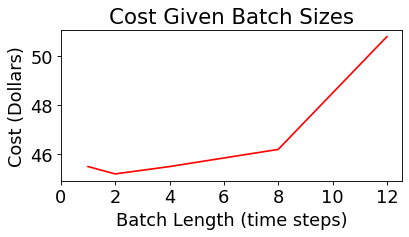

In [14]:
# Collect the correct costs
# Plot the plot
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



# Set Font Size Limitations
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

figure(num=None, figsize=(5.5, 2.5), dpi=80, facecolor='w', edgecolor='k')

batch_settings = [1,2,4,8,12]
costs2 = [45.5, 45.2, 45.5, 46.2, 50.8]

fig = plt.plot(batch_settings, costs2, 'r-')

plt.ylabel('Cost (Dollars)')
plt.xlabel('Batch Length (time steps)')
plt.title('Cost Given Batch Sizes')
plt.xticks(range(0,13,2))